In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
crop_reco=pd.read_csv('datasets/crop_recommendation_v2.csv')
crop_reco

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2095,7,11,22,22.695834,71.466622,6.542159,223.521132,tapioca
2096,8,13,28,18.890846,66.112498,6.950368,230.118555,tapioca
2097,5,11,29,25.214670,73.922861,7.489826,229.897810,tapioca
2098,5,19,23,22.733908,64.597150,5.814361,201.006787,tapioca


In [3]:
hum_df=pd.read_csv('datasets/statewise_seasonwise_humidity.csv')
temp_df=pd.read_csv('datasets/statewise_seasonwise_temperature.csv')
rain_df=pd.read_csv('datasets/statewise_seasonwise_rainfall.csv')

In [49]:
#soil type - got from CNN model
input_soil='Black Soil'

In [55]:
#input from user
input_state="Maharashtra"
input_district="Satara"

input_N=0
input_P=50
input_K=50
input_pH=6.0

In [6]:
input_hum=hum_df[hum_df['state']==input_state]['annual_avg']
input_temp=temp_df[temp_df['state']==input_state]['annual_avg']
if input_district.lower() in list(rain_df['district'].unique()):
    input_rain=rain_df[(rain_df['state']==input_state) & (rain_df['district']==input_district.lower())]['annual_avg'].mean(skipna=True)
else:
    input_rain=rain_df[rain_df['state']==input_state]['annual_avg'].mean(skipna=True)
input_rain

76.04166666666667

In [46]:
defualt_NPK=pd.read_csv('datasets/soil_NPK_values.csv')
defualt_NPK

,soil_type,N,P,K,water_val,pH,organic_val,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Arid Soil,40,70,80,0.2,9.25,3.0,NaN,NaN,NaN
1,Black Soil,80,47,30,0.4,7.85,45.0,NaN,NaN,NaN
2,Cinder Soil,100,30,30,0.2,7.20,6.0,NaN,NaN,NaN
3,Laterite Soil,10,15,40,0.2,6.50,2.5,NaN,NaN,NaN
4,Peat Soil,5,5,5,0.5,4.45,50.0,NaN,NaN,NaN
5,Red Soil,90,45,40,0.2,6.35,6.0,NaN,NaN,NaN
6,Saline Soil,100,45,20,0.3,7.75,2.0,NaN,NaN,NaN
7,Yellow Soil,70,45,25,0.1,6.95,3.5,NaN,NaN,NaN


In [56]:
if input_N==0:
	input_N=defualt_NPK[defualt_NPK['soil_type']==input_soil]['N']
if input_P==0:
	input_P=defualt_NPK[defualt_NPK['soil_type']==input_soil]['P']
if input_K==0:
	input_K=defualt_NPK[defualt_NPK['soil_type']==input_soil]['K']
if input_pH==0:
	input_pH=defualt_NPK[defualt_NPK['soil_type']==input_soil]['pH']

input_N

1    80
Name: N, dtype: int64

### KNN Model

In [8]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [9]:
X=crop_reco.drop('label', axis=1)
X


,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2095,7,11,22,22.695834,71.466622,6.542159,223.521132
2096,8,13,28,18.890846,66.112498,6.950368,230.118555
2097,5,11,29,25.214670,73.922861,7.489826,229.897810
2098,5,19,23,22.733908,64.597150,5.814361,201.006787


In [10]:
y=crop_reco['label']
y

0          rice
1          rice
2          rice
3          rice
4          rice
         ...   
2095    tapioca
2096    tapioca
2097    tapioca
2098    tapioca
2099    tapioca
Name: label, Length: 2100, dtype: object

In [11]:
#Scaling the data to between 0 and 1
scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns)
X

,N,P,K,temperature,humidity,ph,rainfall
0,0.642857,0.264286,0.190,0.345886,0.790267,0.457547,0.637133
1,0.607143,0.378571,0.180,0.371445,0.770633,0.580245,0.727144
2,0.428571,0.357143,0.195,0.406854,0.793977,0.764164,0.868719
3,0.528571,0.214286,0.175,0.506901,0.768751,0.567015,0.788650
4,0.557143,0.264286,0.185,0.324378,0.785626,0.715614,0.863987
...,...,...,...,...,...,...,...
2095,0.050000,0.042857,0.085,0.397998,0.667359,0.466529,0.715249
2096,0.057143,0.057143,0.115,0.288816,0.604901,0.560129,0.740285
2097,0.035714,0.042857,0.120,0.470275,0.696012,0.683823,0.739447
2098,0.035714,0.100000,0.090,0.399091,0.587224,0.299650,0.629814


In [12]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0, test_size=0.2)

In [13]:
knn=KNeighborsClassifier(n_neighbors=5)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_predict=knn.predict(X_test)

/Users/sahilamritkar/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


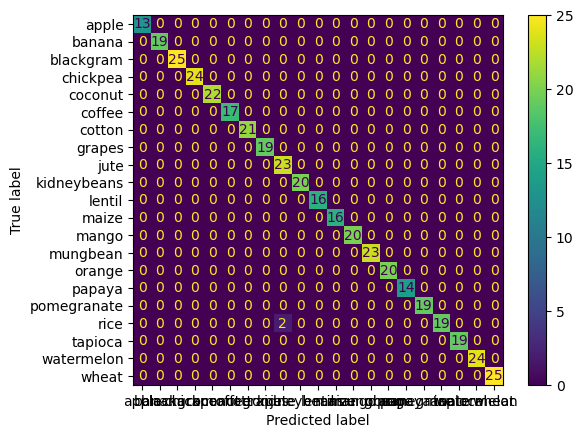

In [16]:
plot_confusion_matrix(knn, X_test, y_test)

In [17]:
accuracy_score(y_test, y_predict)

0.9952380952380953

In [62]:
input_X = pd.DataFrame([{'N':input_N, 'P':input_P, 'K':input_K, 'temperature':input_temp, 'humidity':input_hum, 'ph':input_pH, 'rainfall':input_rain}])
input_X

,N,P,K,temperature,humidity,ph,rainfall
0,"1 80 Name: N, dtype: int64",50,50,"15 28.948333 Name: annual_avg, dtype: float64","15 45.965833 Name: annual_avg, dtype: float64",6.0,76.041667


In [63]:
input_X = pd.DataFrame(scaler.transform(input_X), columns=input_X.columns)
input_X

,N,P,K,temperature,humidity,ph,rainfall
0,0.571429,0.321429,0.225,0.577411,0.369883,0.342216,0.155609


In [59]:
output_y=knn.predict(input_X)
output_y

array(['maize'], dtype=object)

In [83]:
crops_from_location=[output_y[0]]
indices=knn.kneighbors((input_X),return_distance=False)
temp=list(crop_reco['label'][j].values for j in indices)
for i in list(temp[0]):
    crops_from_location.append(i)
crops_from_location=list(crops_from_location)
crops_from_location

[[ 714  625  441  853 1323]]
[array(['pomegranate', 'lentil', 'mungbean', 'banana', 'orange'],
      dtype=object)]


['maize', 'pomegranate', 'lentil', 'mungbean', 'banana', 'orange']

In [21]:
indices=knn.kneighbors(X_test, return_distance=False)
top_classes = []
for i in range(indices.shape[0]):
    top_classes.append((X_test.iloc[i].name,[crop_reco['label'][j] for j in indices[i]], y_test[X_test.iloc[i].name]))
print(*top_classes, sep="\n")

(2085, ['cotton', 'mango', 'banana', 'grapes', 'lentil'], 'tapioca')
(1941, ['papaya', 'coconut', 'pomegranate', 'blackgram', 'banana'], 'wheat')
(1727, ['kidneybeans', 'apple', 'papaya', 'grapes', 'mango'], 'jute')
(1170, ['maize', 'maize', 'watermelon', 'apple', 'grapes'], 'watermelon')
(723, ['papaya', 'blackgram', 'chickpea', 'watermelon', 'chickpea'], 'pomegranate')
(1323, ['mango', 'lentil', 'apple', 'chickpea', 'maize'], 'orange')
(1055, ['apple', 'chickpea', 'kidneybeans', 'papaya', 'mango'], 'grapes')
(905, ['coconut', 'apple', 'grapes', 'mungbean', 'apple'], 'mango')
(1570, ['pomegranate', 'mango', 'banana', 'papaya', 'grapes'], 'coconut')
(1825, ['mango', 'blackgram', 'mungbean', 'chickpea', 'grapes'], 'coffee')
(1191, ['pomegranate', 'coconut', 'cotton', 'kidneybeans', 'cotton'], 'watermelon')
(1317, ['rice', 'maize', 'orange', 'mango', 'chickpea'], 'orange')
(530, ['banana', 'mungbean', 'kidneybeans', 'orange', 'maize'], 'blackgram')
(135, ['coconut', 'mango', 'orange', 'o

In [22]:
y_train[640]

'lentil'

In [24]:
# saving the KNN model
import pickle
pickle_out = open("KNN_model.pickle","wb")
pickle.dump(knn, pickle_out)
pickle_out.close()

In [25]:
# model = pickle.load(open('KNN_model.pickle', 'rb'))